# Lab 2 - Statistics: Shaffer et al.

### (0) Import necessary packages

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

### (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In numpy this is a random number generator whose numbers will be chosen from the desired normal distribution by using the call `np.random.normal(loc=mu, scale=sigma, size=(n, ))`. Sample from this normal distribution from n=1 to 50 (I.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

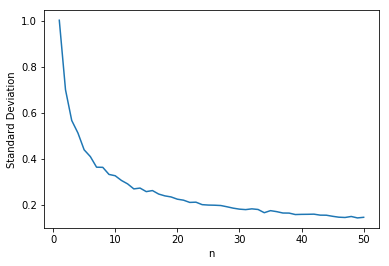

In [2]:
# Initialize parameters
np.random.seed(8465)
mu, sigma, n, ntrials = 5, 1, 50, 1000
mean_array = np.zeros((ntrials, n))
sd_array = np.zeros(n)

# Run measurements and calculate means of each trial for each n
# every row is new trial
# every column is different size
for i in range(0, ntrials):
    for j in range(1, n+1):
        trial = np.random.normal(loc=mu, scale=sigma, size=(j,))
        mean_array[i, j-1] = np.mean(trial)

# Calculate std dev 
sd_array = np.std(mean_array, axis=0)

# Plot std devs
plt.plot(range(1,n+1),sd_array)
plt.xlabel('n')
plt.ylabel('Standard Deviation');

#### (1a) Plot the standard deviation of the estimate of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

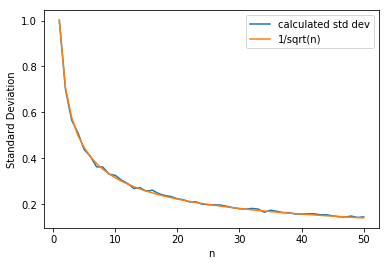

In [3]:
# Plot std dev
plt.plot(range(1,n+1),sd_array)
plt.xlabel('n')
plt.ylabel('Standard Deviation')

# Plot 1/sqrt(n)
plt.plot(range(1,n+1), 1/np.sqrt(range(1,n+1)))

plt.legend(['calculated std dev', '1/sqrt(n)']);

Standard deviation of the sample mean decreases as n increases and follows a $1/\sqrt{n}$ relationship. Therefore, your power to estimate the underlying mean with greater accuracy increases as n increases.

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

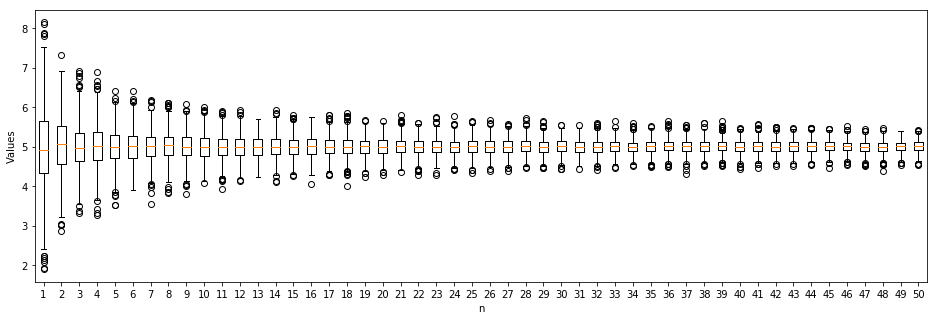

In [4]:
# Plot boxplot
plt.figure(figsize=(16,5))
plt.boxplot(mean_array)
plt.xlabel('n')
plt.ylabel('Values');

The boxplot confirms what we observed in 1a: that the standard deviation of the sample mean decreases as n increases, and that estimating the mean becomes more precise as n increases. The boxplot gives additional information about where the mean of the trials are located for each n whereas the standard plot is easier to read.

#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal (hint you will need to translate this to the standard normal distribution). Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

Mean: 4.979973
Sample Standard Deviation: 0.566320
p-value: 0.848252


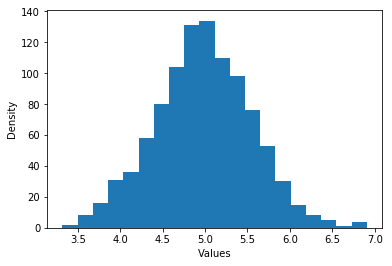

In [5]:
# Plot histogram for n=3
n3 = mean_array[:,2]
plt.hist(n3, 20)
plt.xlabel('Values')
plt.ylabel('Density');

# Use KS test to see if sample distribution is normal
ks_stat, pVal_ks = stats.kstest(stats.zscore(n3), 'norm')
print('Mean: %f' %np.mean(n3))
print('Sample Standard Deviation: %f' %np.std(n3))
print('p-value: %f' %pVal_ks)

The null hypothesis of the KS-test states that the sample was drawn from a normal distribution. Since the p-value is large, we do not reject the null hypothesis.

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

Mean: 5.002224
Sample Standard Deviation: 0.224679
p-value: 0.986878


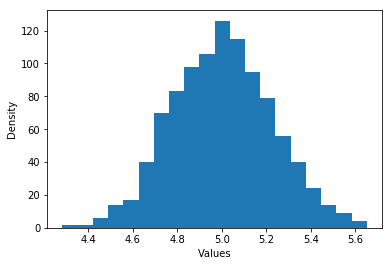

In [6]:
# Plot histogram for n=20
n20 = mean_array[:,19]
plt.hist(n20, 20)
plt.xlabel('Values')
plt.ylabel('Density');

# Use KS test to see if sample distribution is normal
ks_stat, pVal_ks = stats.kstest(stats.zscore(n20), 'norm')
print('Mean: %f' %np.mean(n20))
print('Sample Standard Deviation: %f' %np.std(n20))
print('p-value: %f' %pVal_ks)

When number of samples increases, the p-value increases, which means that the distribution becomes more like a normal distribution. Mean and standard deviation remain relatively the same.

### (2) Weibull distribution

Now we will explore sampling from an alternate distribution type.

#### (2a) Sample the Weibull distribution with parameters a = 1, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

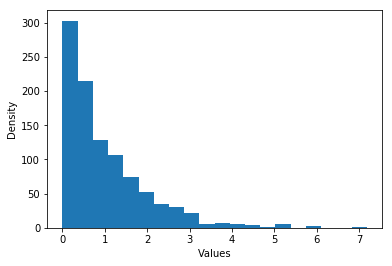

In [7]:
# Create Weibull distribution
weibull_dist = np.random.weibull(a = 1, size=1000)
plt.hist(weibull_dist, 20)
plt.xlabel('Values')
plt.ylabel('Density');

The Weibull distribution with a=1 is dissimilar to a normal distribution. The Weibull distribution is skewed heavily to the right.

#### (2b) As in problem 1, plot a boxplot of the sample distribution of the Weibull with A=1,B=1 from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

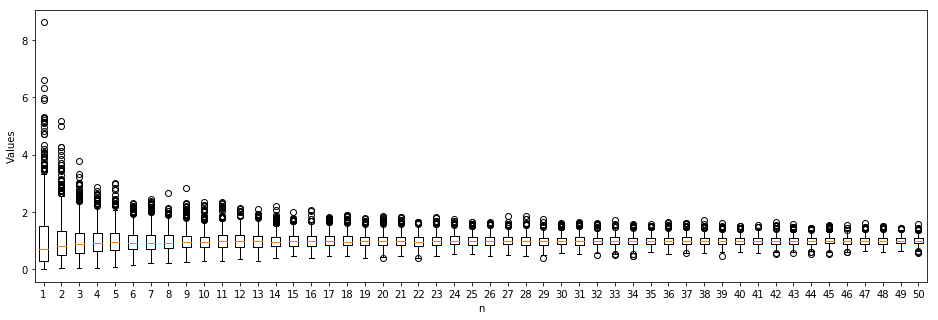

In [8]:
#Initialize parameters
n_w, ntrials_w = 50, 1000
mean_array_w = np.zeros((ntrials_w, n_w))
sd_array_w = np.zeros(n_w)

# Run measurements and calculate means of each trial for each n_w
for i in range(ntrials):
    for j in range(n):
        trial = np.random.weibull(a = 1, size=j+1)
        mean_array_w[i, j] = np.mean(trial)

# Calculate std dev
sd_array_w = np.std(mean_array_w, axis=0)

# Plot boxplot
plt.figure(figsize=(16,5))
plt.boxplot(mean_array_w)
plt.xlabel('n')
plt.ylabel('Values');

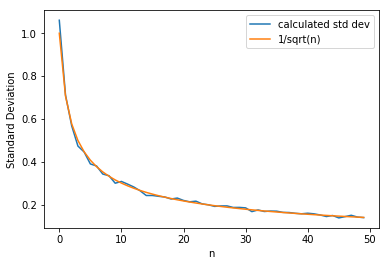

In [9]:
# Plot standard deviation
plt.plot(sd_array_w);
plt.xlabel('n')
plt.ylabel('Standard Deviation')

# Plot 1/sqrt(n)
plt.plot(1/np.sqrt(range(1,n+1)))

plt.legend(['calculated std dev', '1/sqrt(n)']);

The Weibull boxplot shows a longer tail towards the positive values while the boxplot in 1b were evenly distributed. However, in both cases, the spread of the data decreases as n increases. However, the standard deviation of the sample mean follows the same $1/\sqrt{n}$ relationship.

#### (2c) For n=3, plot the histogram of the sample means. What is this distribution, is it Weibull or normal? Report your test results.


p-value for normal distribution     : 0.886045
p-value for exponential distribution: 0.000000


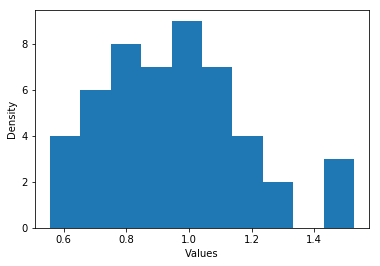

In [10]:
# Plot histogram of n=3
n3_w = mean_array_w[2,:]
plt.hist(n3_w)
plt.xlabel('Values')
plt.ylabel('Density');

# Use KS test to see if sample distribution is normal or exponential
ks_stat_norm3, pVal_ks_norm3 = stats.kstest(stats.zscore(n3_w), 'norm')
ks_stat_expon3, pVal_ks_expon3 = stats.kstest(stats.zscore(n3_w), 'expon')
print('p-value for normal distribution     : %f' %pVal_ks_norm3)
print('p-value for exponential distribution: %f' %pVal_ks_expon3)

This distribution for n = 3 is closer to a normal distribution.

#### 2d. Repeat 2c for n=20.

p-value for normal distribution     : 0.643164
p-value for exponential distribution: 0.000000


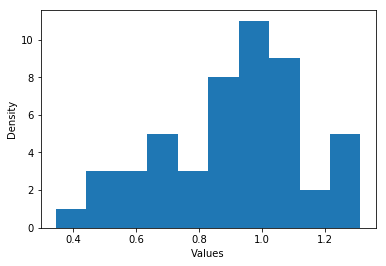

In [11]:
# Plot histogram of n=20
n20_w = mean_array_w[19,:]
plt.hist(n20_w)
plt.xlabel('Values')
plt.ylabel('Density');

# Use KS test to see if sample distribution is normal or exponential
ks_stat_norm20, pVal_ks_norm20 = stats.kstest(stats.zscore(n20_w), 'norm')
ks_stat_expon20, pVal_ks_expon20 = stats.kstest(stats.zscore(n20_w), 'expon')
print('p-value for normal distribution     : %f' %pVal_ks_norm20)
print('p-value for exponential distribution: %f' %pVal_ks_expon20)

This distribution for n = 20 is also closer to a normal distribution.

#### (2e) Repeat 2c but with A=10 and B=2 (I.e plot the histogram of the calculated sample means for 1000 trials of n=3). What is this distribution, Weibull or normal?

p-value for normal distribution     : 0.054446
p-value for exponential distribution: 0.000000


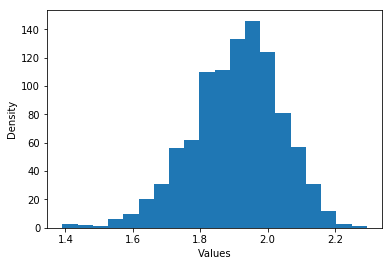

In [12]:
#Initialize parameters
ntrials_w2 = 1000
mean_array_w2 = np.zeros(ntrials_w2)

# Run measurements and calculate means of each trial for each n_w
for i in range(0, ntrials_w2):
    trial = 2*np.random.weibull(a=10, size=3)
    mean_array_w2[i] = np.mean(trial)

# Plot histogram
plt.hist(mean_array_w2, 20)
plt.xlabel('Values')
plt.ylabel('Density');

# Use KS test to see if sample distribution is normal or exponential
ks_stat_w2_norm, pVal_ks_w2_norm = stats.kstest(stats.zscore(mean_array_w2), 'norm')
ks_stat_w2_expon, pVal_ks_w2_expon = stats.kstest(stats.zscore(mean_array_w2), 'expon')
print('p-value for normal distribution     : %f' %pVal_ks_w2_norm)
print('p-value for exponential distribution: %f' %pVal_ks_w2_expon)

This distribution is closer to a normal distribution.

## (3) Differential expression . In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

In [13]:
def dist(option, n):
    '''Returns either distribution 1 or 2 of size n'''
    if (option == 1):
        return np.random.normal(loc=1, scale=1, size=n)
    elif (option==2):
        return np.random.normal(loc=3, scale=1, size=n)

#### (3a) False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [14]:
def count_false_neg(size, ntrials):
    '''Counts number of false negatives'''
    false_neg = 0
    for i in range(0, ntrials):
        set1 = dist(1, size)
        set2 = dist(2, size)
        t, pVal = stats.ttest_ind(set1, set2)
        if (pVal > alpha):
            false_neg = false_neg + 1
    return false_neg

# Initialize parameters
alpha = 0.05
ntrials = 100
n=3

print("Number of false negatives: %d" %count_false_neg(n, ntrials))

Number of false negatives: 48


The null hypothesis of the T-test is that the samples have the same average values. Failing to reject the null hypothesis is a false negative because it falsely states that the samples have the same average values when the samples actually have different mu's.

#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [15]:
def count_false_pos(size, ntrials):
    '''Counts number of false positives'''
    false_pos = 0
    for i in range(0, ntrials):
        set1 = dist(1, size)
        set2 = dist(1, size)
        t, pVal = stats.ttest_ind(set1, set2)
        if (pVal < alpha):
            false_pos = false_pos + 1
    return false_pos

# Initialize parameters
alpha = 0.05
ntrials = 100
n=3

print("Number of false positives: %d" %count_false_pos(3, 100))

Number of false positives: 7


The null hypothesis of the T-test is that the samples have the same average values. Rejecting the null hypothesis is a false positive because it falsely states that the samples have the different average values when the samples actually have the same mu's.

#### (3c) Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [16]:
# Initialize parameters
alpha = 0.05
ntrials = 1000
n=3

print("Number of false positives: %d" %count_false_pos(n, ntrials))

Number of false positives: 43


I would expect the number of false positives to increase proportionally with the number of comparisons. Thus, if we sample 10,000 times, we can expect around 400-600 false positives.

In [17]:
ntrials = 10000
print("Number of false positives: %d" %count_false_pos(n, ntrials))

Number of false positives: 471


#### (3d) Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

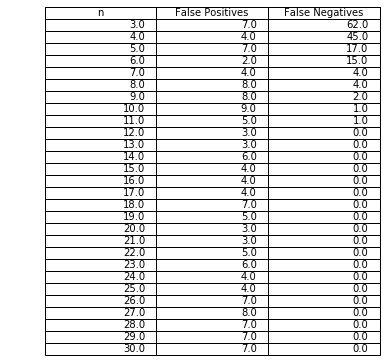

In [18]:
# Count false positives and false negatives
ntrials = 100
table_array = np.zeros((30-3+1, 3))
table_array[:,0] = range(3, 31)
for i in range(3, 31):
    table_array[i-3, 1] = count_false_pos(i, ntrials)
    table_array[i-3, 2] = count_false_neg(i, ntrials)
    
# Provide in table format
fig, ax = plt.subplots()
ax.table(cellText = table_array,colLabels = ['n','False Positives', 'False Negatives'], loc='center')
ax.axis('tight')
ax.axis('off')
plt.show()

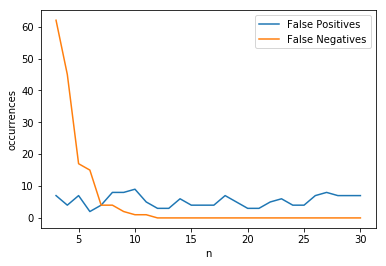

In [19]:
plt.plot(table_array[:,0], table_array[:,1])
plt.plot(table_array[:,0], table_array[:,2])
plt.xlabel('n')
plt.ylabel('occurrences')
plt.legend(['False Positives', 'False Negatives']);

As n increases, the number of false negatives decreases. This is because as the number of datapoints increases, the shape of the distribution becomes more defined and it becomes easier to identify similar distributions correctly. There is no noticeable trend for false positives as n increases.

#### (3e) For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

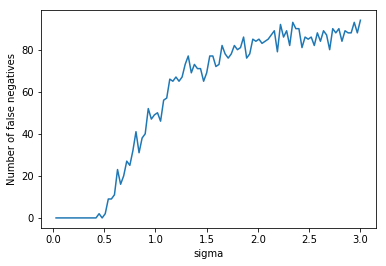

In [20]:
n = 3
ntrials = 100
false_neg = np.zeros(ntrials)

for j in range(0, 100):
    for i in range(0, ntrials):
        sigma = i*0.03
        set1 = np.random.normal(loc=1, scale=sigma, size=n)
        set2 = np.random.normal(loc=3, scale=sigma, size=n)
        t, pVal = stats.ttest_ind(set1, set2)
        if (pVal > alpha):
            false_neg[i] = false_neg[i] + 1

plt.plot([0.03*float(x) for x in range(1,101)], false_neg)
plt.xlabel('sigma')
plt.ylabel('Number of false negatives');

#### (3f) Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives?

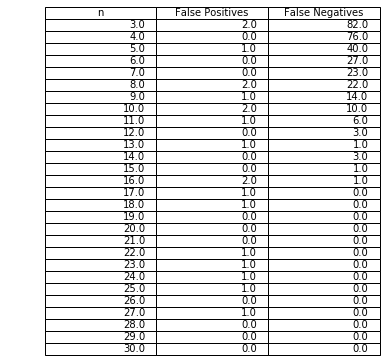

In [21]:
# Initialize parameters
ntrials = 100
alpha = 0.01
table_array = np.zeros((30-3+1, 3))
table_array[:,0] = range(3, 31)

# Count false positives and false negatives
for i in range(3, 31):
    table_array[i-3, 1] = count_false_pos(i, ntrials)
    table_array[i-3, 2] = count_false_neg(i, ntrials)
    
# Provide in table format
fig, ax = plt.subplots()
ax.table(cellText = table_array,colLabels = ['n','False Positives', 'False Negatives'], loc='center')
ax.axis('tight')
ax.axis('off')
plt.show()

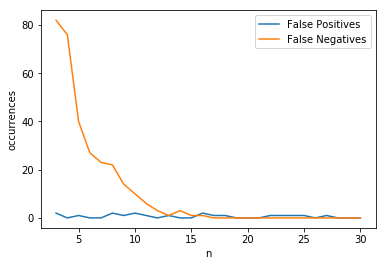

In [22]:
plt.plot(table_array[:,0], table_array[:,1])
plt.plot(table_array[:,0], table_array[:,2])
plt.xlabel('n')
plt.ylabel('occurrences')
plt.legend(['False Positives', 'False Negatives']);

This decreases the number of false positives but increases the number of false negatives.

## (4) Shaffer et al implementation

In this excercise we're going to apply some basic concepts of statistics to a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment).

This data doesn't come from the original experiment, but rather a recent study that [applied a similar approach to study cancer cell resistance](https://www.nature.com/nature/journal/v546/n7658/abs/nature22794.html).

In [23]:
repOne = np.loadtxt("expt_rep1.csv")
repTwo = np.loadtxt("expt_rep2.csv")

#### (4a) First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Also, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

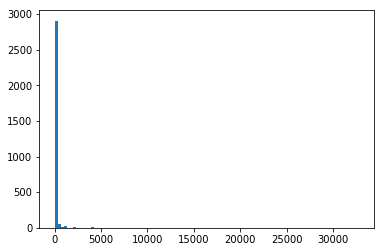

In [24]:
def simLuriaDelbruck(cultureSize, mutationRate):
    '''
    Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side
    '''
    
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells  # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = 2*nMuts + newMuts  # Previous mutants divide and add
        nCells = nCells - newMuts  # Non-resistant pop goes down by newMuts

    return nMuts

def CVofNRuns():
    '''This function runs simLuriaDelbruck 3000 times and returns the results'''
    n = 3000
    dist = np.zeros(n)
    for i in range(0, n):
        dist[i] = simLuriaDelbruck(120000, 0.0001)
    return dist

# run simLuriaDelbruck 3000 times
model = CVofNRuns()
plt.hist(model, 100);

#### (4b) Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test (`sp.stats.ks_2samp`). Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [25]:
ks_stat, pVal_ks = stats.ks_2samp(repOne/np.mean(repOne), repTwo/np.mean(repTwo))
print('p-value: %f' %pVal_ks)

p-value: 0.192752


Since the p-value is small, we reject the null hypothesis, which states that the two samples were drawn from the same distribution.

#### (4c) Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [26]:
ks_stat, pVal_ks = stats.ks_2samp(model/np.mean(model), repTwo/np.mean(repTwo))
print('p-value: %f' %pVal_ks)

p-value: 0.000000


Since the p-value is small, we reject the null hypothesis, which states that the two samples were drawn from the same distribution. Therefore, the model and experiment are not consistent with each other.

#### (4d) We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

We can show whether these parameters influenced our results by independently varying the specific mutation rate and number of cells.